In [1]:
# Script to graph the number of TIME for ranked enumeration
## first scenario

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns
import os

In [2]:
alg_label = ["G. LOUDS Backtrack.", 
             "G. LOUDS Op. Order",
             "G. DFUDS Backtrack.", 
             "G. DFUDS Op. Order"]

In [3]:
# List of query patterns
patterns = ["j3","j4","p2","p3","p4","s3","t2","t3","t4","ti2","ti3"]
# Initialize an empty NumPy array
number_res = np.array([])

In [4]:
for pattern in patterns:
    number_results_file = np.loadtxt(f'../../query1000results/original/{pattern}-k1-v1000-number-res.txt')

    # Ensure it's an array (in case it loads as a scalar)
    number_results_file = np.atleast_1d(number_results_file)

    # Concatenate instead of element-wise addition
    number_res = np.concatenate((number_res, number_results_file))

In [5]:
len(number_res) # eje x

51

In [5]:
# Dictionary to store data
data = {}
#data["original"] = np.array([])
data["gradualLoudsBack"] = np.array([])
data["gradualLoudsNon"] = np.array([])
data["gradualDfudsBack"] = np.array([])
data["gradualDfudsNon"] = np.array([])


for type_fun in [0]:#,1]:
    for k in [1]: 
        for i,query in enumerate(patterns): 
            file = f"{query}-f{type_fun}-k{k}-v1000-time.txt"
            file_v2 = f"{query}-f{type_fun}-k{k}-v1000-time-v2.txt"
            file_original = f"{query}-k1-v1000-time.txt"
            
            original = np.loadtxt(f'../../query1000results/original/{file_original}', dtype=float)

            original = np.atleast_1d(original)
            
            gradualLoudsBack = np.loadtxt(f'../../query1000results/partial/louds/backtracking/{file_v2}', dtype=float)
            gradualLoudsBack = np.atleast_1d(gradualLoudsBack)
            gradualLoudsNon = np.loadtxt(f'../../query1000results/partial/louds/optimalOrder/{file}', dtype=float)
            gradualLoudsNon = np.atleast_1d(gradualLoudsNon) 
            gradualDfudsBack = np.loadtxt(f'../../query1000results/partial/dfuds/backtracking/{file_v2}', dtype=float)
            gradualDfudsBack = np.atleast_1d(gradualDfudsBack) 
            gradualDfudsNon = np.loadtxt(f'../../query1000results/partial/dfuds/optimalOrder/{file}', dtype=float)
            gradualDfudsNon = np.atleast_1d(gradualDfudsNon) 
            
            #data["original"]=np.concatenate((data["original"], original))
            data["gradualLoudsBack"] = np.concatenate((data["gradualLoudsBack"], gradualLoudsBack/original))
            data["gradualLoudsNon"] = np.concatenate((data["gradualLoudsNon"], gradualLoudsNon/original))
            data["gradualDfudsBack"] = np.concatenate((data["gradualDfudsBack"], gradualDfudsBack/original))
            data["gradualDfudsNon"] = np.concatenate((data["gradualDfudsNon"], gradualDfudsNon/original))
            
        

In [7]:
len(data["gradualLoudsBack"])

51

In [6]:
colors = {
    "gradualLoudsBack": "#4169E1",  # Royal Blue
    "gradualLoudsNon": "#DC143C",   # Crimson
    "gradualDfudsBack": "#FF8C00",  # Dark Orange
    "gradualDfudsNon": "#2E8B57"    # Sea Green
}

# # Daltonic-Friendly Colors
colors_daltonic = {
     "gradualLoudsBack": "#000080",  # Navy Blue
     "gradualLoudsNon": "#800080",   # Magenta
     "gradualDfudsBack": "#FFD700",  # Gold
     "gradualDfudsNon": "#008080"    # Teal
}

#'dodgerblue', 'darkturquoise', 'mediumspringgreen', 'lime'
#colors = ['#de2d26','#756bb1', '#addd8e','#3182bd', '#c51b8a']
#colors = ['#de2d26','#fec44f', '#31a354','#3182bd', '#c51b8a']
colors = {
    "gradualLoudsBack": "#fec44f", 
    "gradualLoudsNon": "#31a354",   
    "gradualDfudsBack": "#3182bd",  
    "gradualDfudsNon": "#c51b8a"  
}

#colors = ['red','hotpink', 'peru','lightsalmon', 'gold', 'dodgerblue', 'darkturquoise', 'mediumspringgreen', 'lime', 'fuchsia']

labels = {
    "gradualLoudsBack": "Gradual LOUDS Backtracking",
    "gradualLoudsNon": "Gradual LOUDS Optimal Order",
    "gradualDfudsBack": "Gradual DFUDS Backtracking",
    "gradualDfudsNon": "Gradual DFUDS Optimal Order"
}

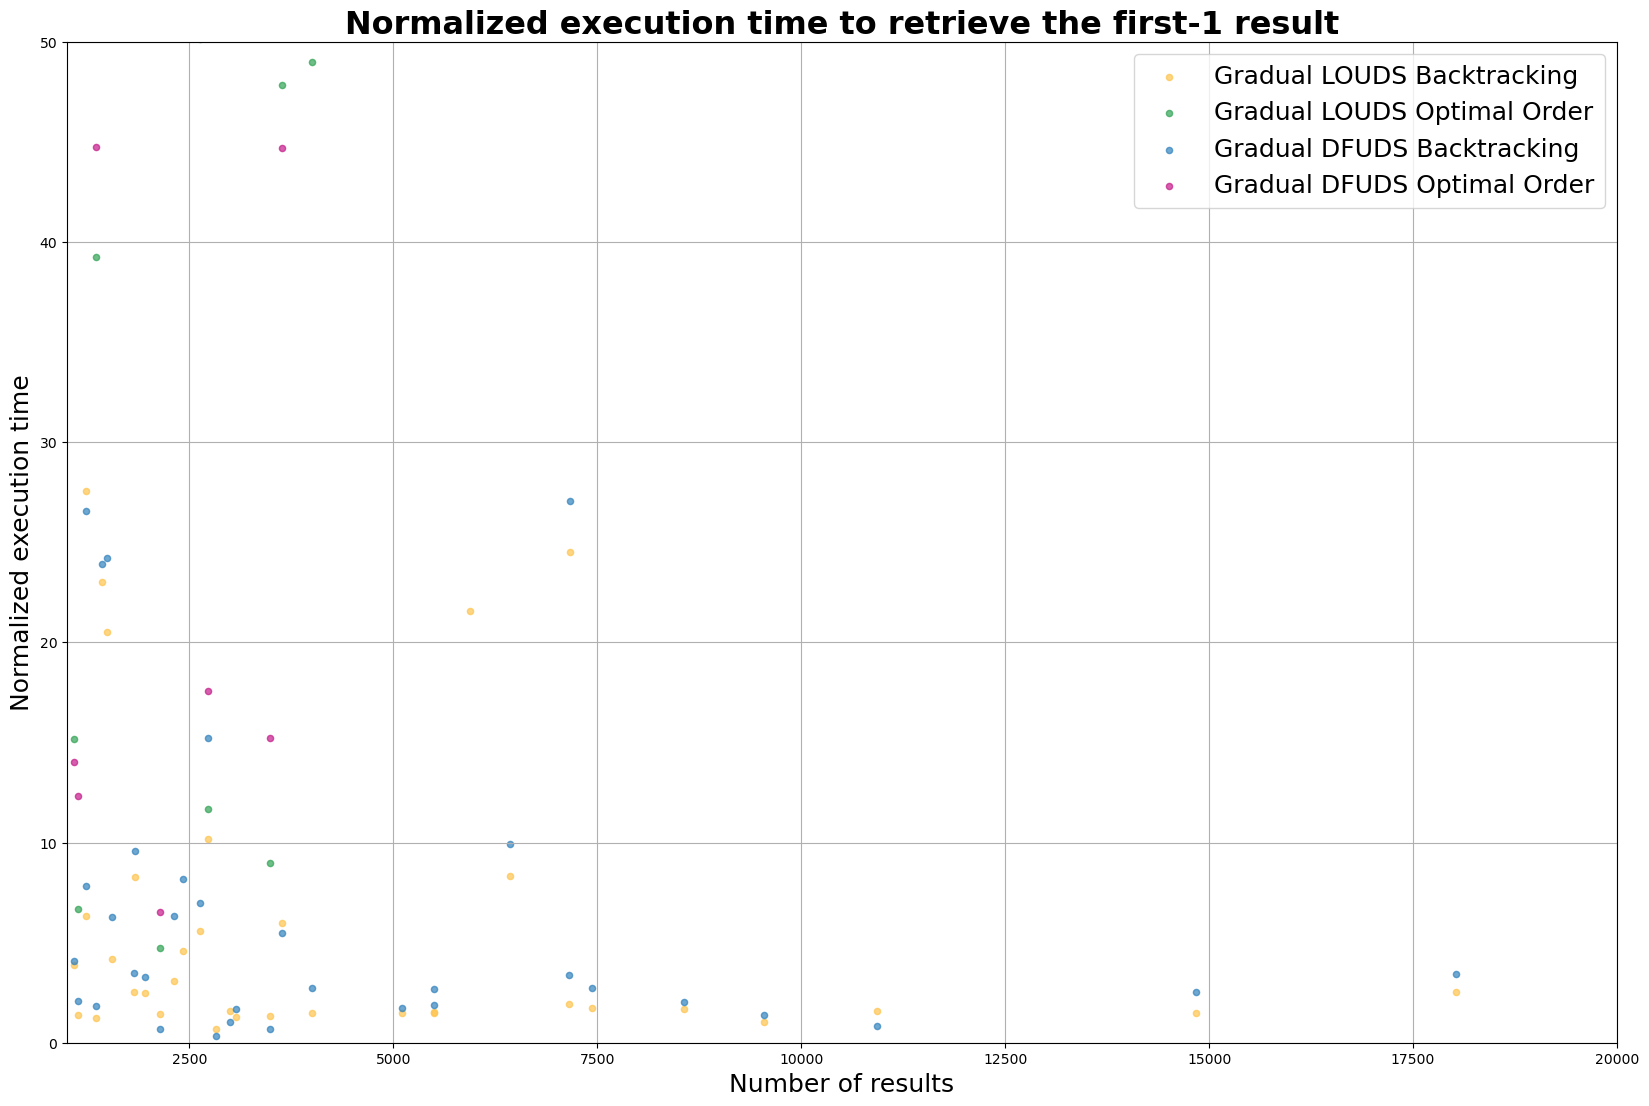

In [7]:
# Create the scatter plot
plt.figure(figsize=(20, 13))

# Plot each algorithm with its corresponding color
for algo, values in data.items():
    plt.scatter(number_res, values, label=labels[algo], color=colors[algo], alpha=0.7, s=20)

#plt.xlim(800,600000)
plt.xlim(1000,20000)
plt.ylim(0,50)
# Labels and title
plt.xlabel("Number of results",fontsize=18)
plt.ylabel("Normalized execution time",fontsize=18)
plt.title("Normalized execution time to retrieve the first-1 result",fontsize=23, fontweight='bold')
plt.legend(fontsize=18)
plt.grid(True)

#plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/scatter_plot_gradual-time.pdf')
plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/scatter_plot_gradual-time-zoom.pdf')

# Show the plot
plt.show()

In [8]:
## nodes
def load_hex_file(file_path):
    with open(file_path, 'r') as file:
        # Read lines, strip whitespace, and convert from hex to float
        return np.array([float.fromhex(line.strip()) for line in file])


In [9]:
# Dictionary to store data
data = {}
#data["original"] = np.array([])
data["gradualLoudsBack"] = np.array([])
data["gradualLoudsNon"] = np.array([])
data["gradualDfudsBack"] = np.array([])
data["gradualDfudsNon"] = np.array([])

for type_fun in [0]:#,1]:
    for k in [1]: 
        for i,query in enumerate(patterns): 
            #print(query)
            file = f"{query}-f{type_fun}-k{k}-v1000-nodes.txt"
            file_v2 = f"{query}-f{type_fun}-k{k}-v1000-nodes-v2.txt"
            file_original = f"{query}-k1-v1000-nodes.txt"
            
            original = load_hex_file(f'../../query1000results/original/{file_original}')
            #print(original)

            #original = np.atleast_1d(original)
            
            gradualLoudsBack = load_hex_file(f'../../query1000results/partial/louds/backtracking/{file_v2}')
            #rankedLoudsBack = np.atleast_1d(rankedLoudsBack)
            gradualLoudsNon = load_hex_file(f'../../query1000results/partial/louds/optimalOrder/{file}')
            #rankedLoudsNon = np.atleast_1d(rankedLoudsNon) 
            gradualDfudsBack = load_hex_file(f'../../query1000results/partial/dfuds/backtracking/{file}')
            #print(rankedDfudsBack)
            #rankedDfudsBack = np.atleast_1d(rankedDfudsBack) 
            gradualDfudsNon = load_hex_file(f'../../query1000results/partial/dfuds/optimalOrder/{file}')
            #rankedDfudsNon = np.atleast_1d(rankedDfudsNon) 
            
            if(len(gradualLoudsBack)!= len(gradualLoudsNon) != len(gradualDfudsBack) != len(gradualDfudsNon) != len(original)):
                print(query)
            
            #data["original"]=np.concatenate((data["original"], original))
            data["gradualLoudsBack"] = np.concatenate((data["gradualLoudsBack"], gradualLoudsBack/original))
            data["gradualLoudsNon"] = np.concatenate((data["gradualLoudsNon"], gradualLoudsNon/original))
            data["gradualDfudsBack"] = np.concatenate((data["gradualDfudsBack"], gradualDfudsBack/original))
            data["gradualDfudsNon"] = np.concatenate((data["gradualDfudsNon"], gradualDfudsNon/original))
            

In [17]:
len(data["gradualDfudsNon"])

51

In [10]:
colors = {
    "rankedLoudsBack": "#4169E1",  # Royal Blue
    "rankedLoudsNon": "#DC143C",   # Crimson
    "rankedDfudsBack": "#FF8C00",  # Dark Orange
    "rankedDfudsNon": "#2E8B57"    # Sea Green
}

# # Daltonic-Friendly Colors
colors_daltonic = {
     "rankedLoudsBack": "#000080",  # Navy Blue
     "rankedLoudsNon": "#800080",   # Magenta
     "rankedDfudsBack": "#FFD700",  # Gold
     "rankedDfudsNon": "#008080"    # Teal
}


colors = {
    "gradualLoudsBack": "hotpink", 
    "gradualLoudsNon": "peru",   
    "gradualDfudsBack": "lightsalmon",  
    "gradualDfudsNon": "gold"  
}
colors = {
    "gradualLoudsBack": "#fec44f", 
    "gradualLoudsNon": "#31a354",   
    "gradualDfudsBack": "#3182bd",  
    "gradualDfudsNon": "#c51b8a"  
}
#colors = ['red','hotpink', 'peru','lightsalmon', 'gold', 'dodgerblue', 'darkturquoise', 'mediumspringgreen', 'lime', 'fuchsia']

labels = {
    "gradualLoudsBack": "Gradual LOUDS Backtracking",
    "gradualLoudsNon": "Gradual LOUDS Optimal Order",
    "gradualDfudsBack": "Gradual DFUDS Backtracking",
    "gradualDfudsNon": "Gradual DFUDS Optimal Order"
}

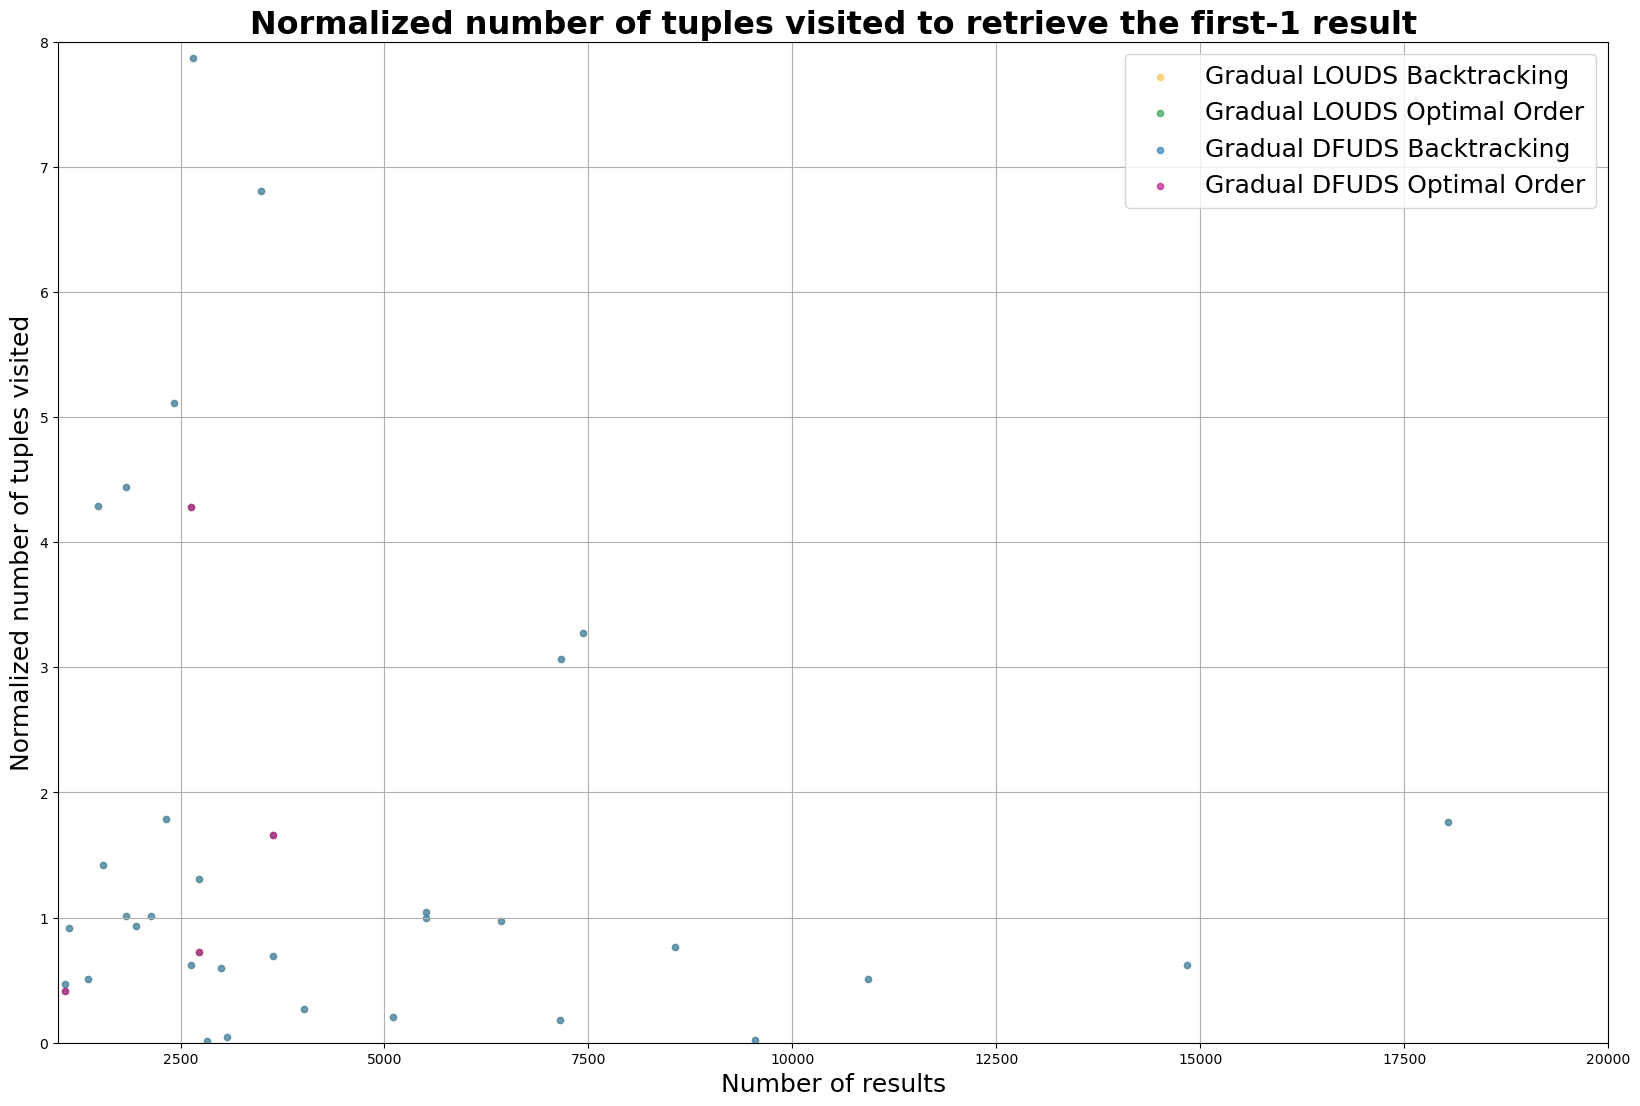

In [11]:
# Create the scatter plot
plt.figure(figsize=(20, 13))

# Plot each algorithm with its corresponding color
for algo, values in data.items():
    plt.scatter(number_res, values, label=labels[algo], color=colors[algo], alpha=0.7, s=20)


#plt.xlim(800,600000)
plt.xlim(1000,20000)
plt.ylim(0,8)
# Labels and title
plt.xlabel("Number of results",fontsize=18)
plt.ylabel("Normalized number of tuples visited",fontsize=18)
plt.title("Normalized number of tuples visited to retrieve the first-1 result",fontsize=23, fontweight='bold')
plt.legend(fontsize=18)
plt.grid(True)

#plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/scatter_plot_gradual-nodes.pdf')
plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/scatter_plot_gradual-nodes-zoom.pdf')

# Show the plot
plt.show()